In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
% matplotlib inline
import logging
import os
import math
from collections import OrderedDict

from madminer.delphes import DelphesProcessor
from madminer.lhe import LHEProcessor

logging.basicConfig(format='%(asctime)s  %(message)s', datefmt='%H:%M')


In [2]:
base_dir = '/Users/johannbrehmer/work/projects/madminer/diboson_mining/'
mg_dir = '/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_2/'

In [3]:
sample_dir = base_dir + 'data/samples/wgamma/'
card_dir = base_dir + 'cards/wgamma/'
ufo_model_dir = card_dir + 'SMWgamma_UFO'
run_card_dir = card_dir + 'run_cards/'
mg_process_dir = base_dir + 'data/mg_processes/wgamma/'
log_dir = base_dir + 'logs/wgamma/'
temp_dir = base_dir + 'data/temp'
delphes_dir = mg_dir + 'Delphes'

## Load data

In [4]:
t_xz = np.load(sample_dir + 'all_local_tight/t_xz_all.npy')
x = np.load(sample_dir + 'all_local_tight/x_all.npy')

In [5]:
mean = np.mean(t_xz, axis=0)
cov = np.cov(t_xz.T)

In [9]:
mean

array([0.01166823, 0.0368635 ])

In [8]:
cov

array([[452.63531553,  -2.58203101],
       [ -2.58203101, 440.69054584]])

## Score

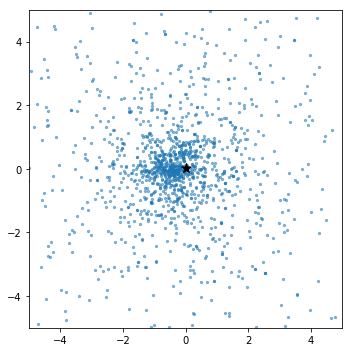

In [12]:
skip=500

fig = plt.figure(figsize=(5,5))

plt.scatter(t_xz[::skip,0], t_xz[::skip,1], s=5., alpha=0.5)
plt.scatter(mean[0], mean[1], s=100., alpha=1., color='black', marker='*')

plt.xlim(-5.,5.)
plt.ylim(-5.,5.)

plt.tight_layout()
plt.show()

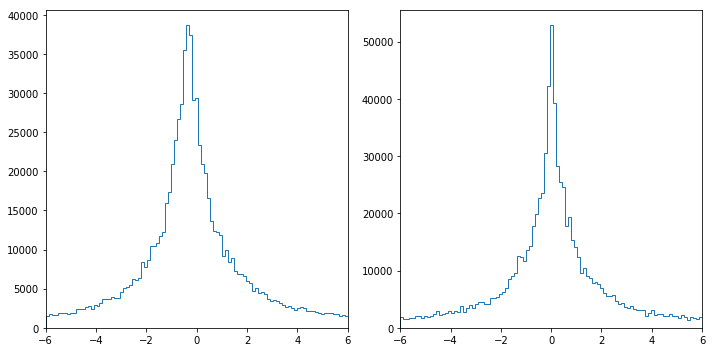

In [17]:
fig = plt.figure(figsize=(10,5))

for i in range(2):
    fig = plt.subplot(1,2,i+1)
    plt.hist(t_xz[::,i], histtype='step', range=(-6.,6.), bins=101)

    plt.xlim(-6.,6.)

plt.tight_layout()
plt.show()

## Score vs observables

In [24]:
x_neg = x[t_xz[:,0] < -1]
x_pos = x[t_xz[:,0] > 1]

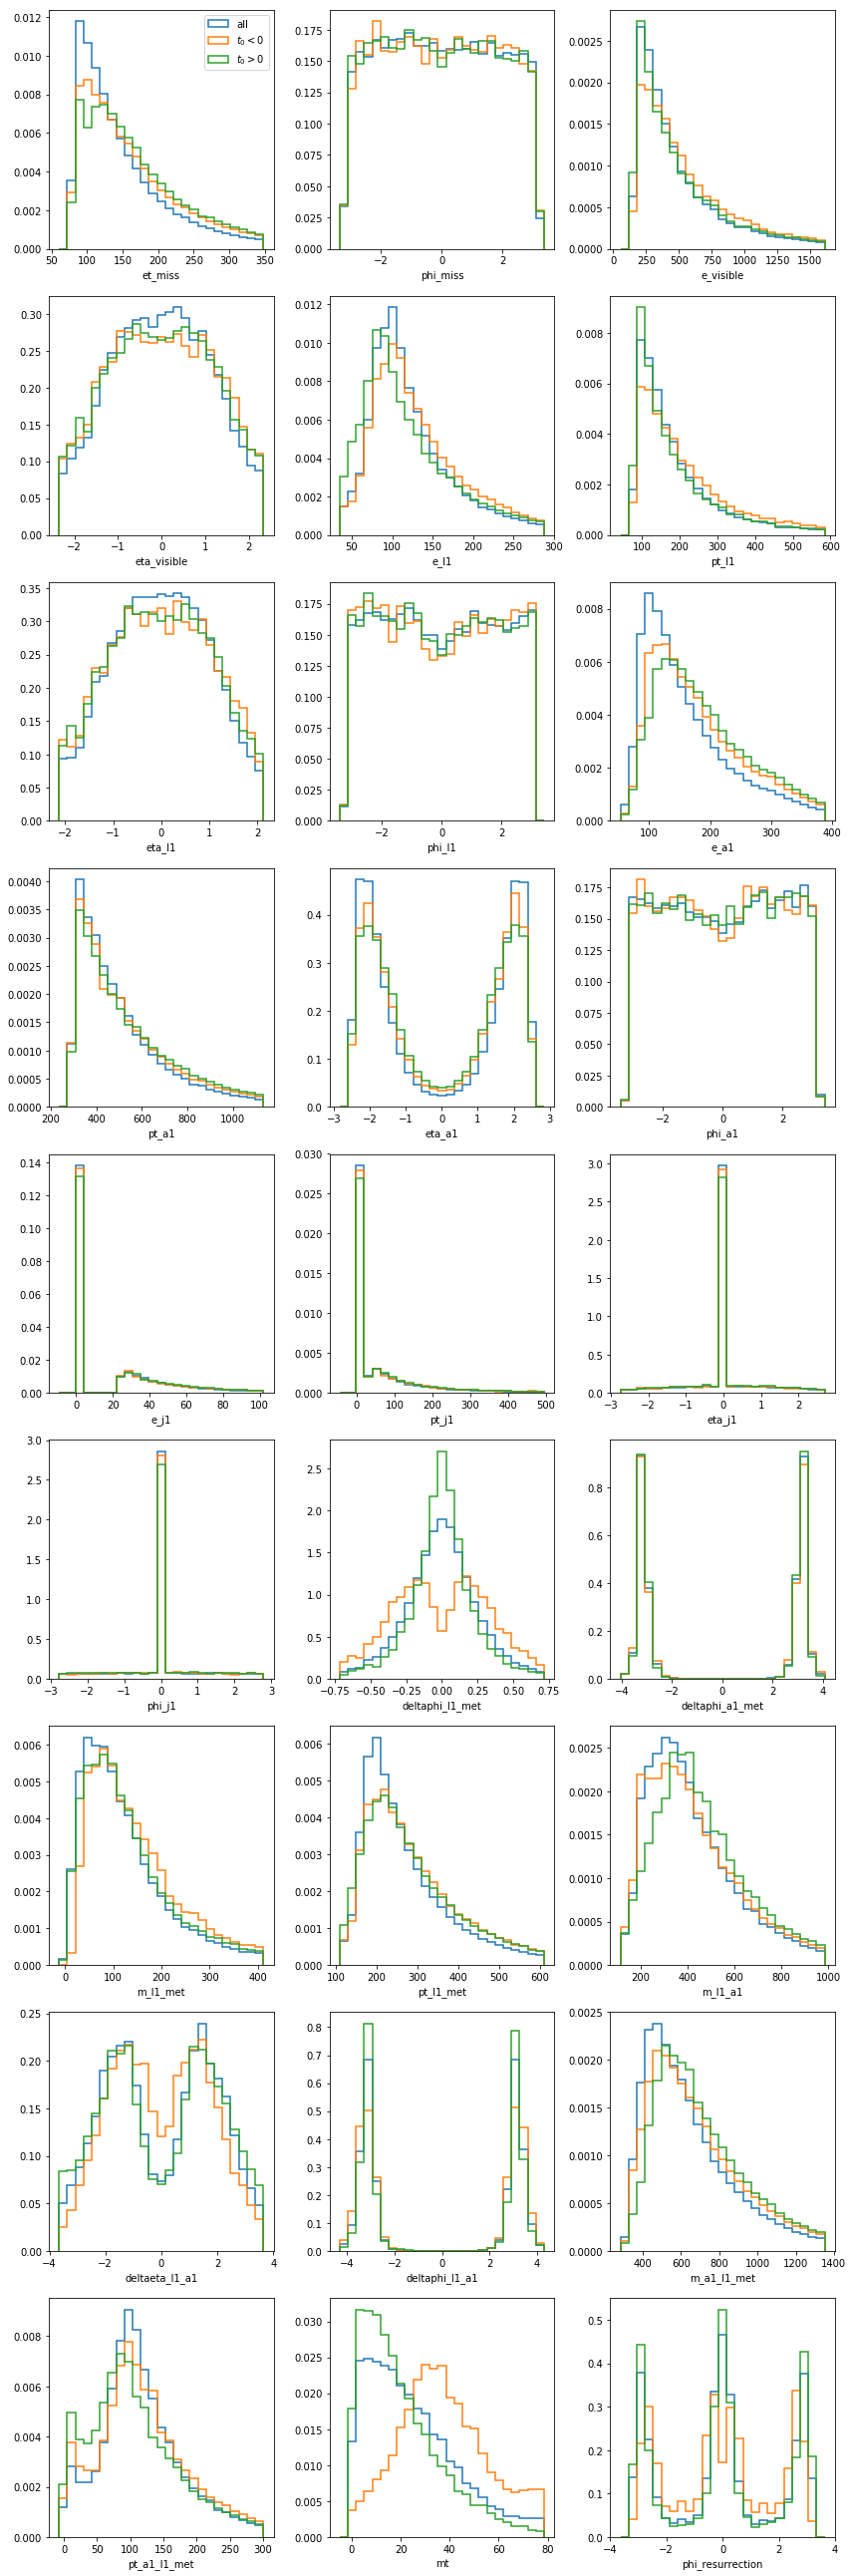

In [25]:
bins = 25
n_observables = x.shape[1]
n_cols = 3
n_rows = (n_observables + n_cols - 1) // n_cols
labels = ["et_miss", "phi_miss", "e_visible", "eta_visible", "e_l1", "pt_l1", "eta_l1", "phi_l1", "e_a1", "pt_a1", "eta_a1", "phi_a1", "e_j1", "pt_j1", "eta_j1", "phi_j1", "deltaphi_l1_met", "deltaphi_a1_met", "m_l1_met", "pt_l1_met", "m_l1_a1", "deltaeta_l1_a1", "deltaphi_l1_a1", "m_a1_l1_met", "pt_a1_l1_met", "mt", "phi_resurrection"]

plt.figure(figsize=(4. * n_cols, 4. * n_rows))

for i, label in enumerate(labels):
    xmin = np.percentile(x[:,i], 5.)
    xmax = np.percentile(x[:,i], 95.)
    xwidth = xmax - xmin
    xmin -= xwidth * 0.1
    xmax += xwidth * 0.1
    x_range = (xmin, xmax)
    
    ax = plt.subplot(n_rows, n_cols, i+1)
       
    plt.hist(x[:,i], histtype='step', range=x_range, bins=bins, lw=1.5, label=r'all', density=True) 
    plt.hist(x_neg[:,i], histtype='step', range=x_range, bins=bins, lw=1.5, label=r'$t_0 < 0$', density=True) 
    plt.hist(x_pos[:,i], histtype='step', range=x_range, bins=bins, lw=1.5, label=r'$t_0 > 0$', density=True) 
    
    if i == 0:
        plt.legend()
        
    plt.xlabel(label)
    
plt.tight_layout()
plt.show()